# ise291 project - T222 - Section 12

## How we came across this dataset:

First we decided to lock for a dataset that discuss problems in the health or education industries as they are our preferred topics. We spent some time looking for a dataset that meets the requirements of this project in repositories and websites such as kaggle and others. Eventually, we had to choose between the following datasets (Hotels, stroke prediction, obesity, the impact of C-19 of student's performance). After a consulting the instructor and briefly considering the quality of the data we picked the stroke data.   

# Discovery:

Name of the dataset: Strokes

Source: kaggle

Link to the dateset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

The attributes of the dateset:
1. id--Numerical--unique number for indiviuals
2. gender--Categotical--states the sex of the person
3. age--Numerical--the age of the indiviual
4. hypertension--Categotical--does the person suffer from high blood pressure
5. heart_disease--Categotical--does the person suffer from heart disease
6. ever_married--Categotical--states wether the person ever got married
7. work_type--Categotical--states the kind of occupation of the person
8. Residence_type--Categotical--kind of area the person is setelling in
9. avg_glucose_level--Numerical--the level of glucose in the person's blood
10. bmi--Numerical--the body mass index measure of the person
11. smoking_status--Categotical--the person current somking situation
12. stroke(dependent)--Categotical--states wether the person had a stroke or not



## Problem Statement:
Stroke is the second leading cause of death and a major contributor to disability worldwide. The prevalence of stroke is highest in developing countries, with ischemic stroke being the most common type. the combined resluts from people who had a stroke and the emotional unstablaty of those who are related to them have caused projects to halt and progress to decline in various industries. In the light of these facts, the national health institution intend to  fix this by educating both indiviuals and companies looking to excel in their careers about the possible ways to reduce the chance of having a stroke. To achieve that, the national health institution has collected some health-ralted and some social-related information from individuals in different areas. Based on the outcomes of this research, we as the institution's representatives hope to uncover the relationships beetween the gathered data, and share some guidelines with the public to demonstrate the significance of some overlocked indecation of having a stroke.



## Objective:

The goal of this project is to analyze the data and predict whether an indiviual is likely to get a stroke based on various factors.
In this project, we intend to uncover the pssible relationships between having a stroke and some health-related conditions such as hypertension, heart disease, bmi and smoking status. Moreover, we would investegate if the area of residence and the type of carrier of the person are of any affect on the likelyness of having a stroke. Lastly, are the marital status and the age connected to the possiblity of having a stroke.


### Hypothesis:
The variables (hypertension, heart_disease, ever_married, work_type, avg_glucose_level, smoking_status) are the ones that are a segnificantlly related to the result of the dependent attribute (stroke) 

# Data Preparation:

Note: since the data is clean, some noisy data and missing observation have been created manually to prepare the data for the next phase 

In [546]:
import pandas as pd
df = pd.read_csv('strokes.csv', delimiter=',')
print("this is the data before cleaning")
display(df)
print("Data types of all features:")
display(df.info())

this is the data before cleaning


id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male -67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

Data types of all features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5095 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

In [547]:
# Resolving the negative sign the age column
df['age'] = df['age'].map(lambda x: abs(x))

# converting the age attribute form float to integer
df['age'] = df['age'].map(lambda x: round(x))

print(f'Columns with null values are: { null_columns}')

# Resolving the the missing values in the bmi column and rounding the data
df["bmi"].fillna(df["bmi"].mean(),inplace=True)
df['bmi'] = df['bmi'].map(lambda x: round(x,2)) 

# Resolving the the missing values in the ever_married column
df["ever_married"].fillna(df["ever_married"].mode()[0],inplace=True)

# deleting the id column
df=df.drop(["id"],axis=1)

# deleting the rows that have the value (other) in the gender column
selected_rows = df["gender"]=="Other"
df = df[df["gender"] != "Other"]

# converting the heart disease and hypertension columns to categorical ones 
seleted_cols = df.loc[:,"hypertension":"heart_disease"].columns
df[seleted_cols]=df[seleted_cols].applymap(lambda x: "Yes" if x==1 else "No")

# converting the stroke column to categorical ones
df["stroke"]=df["stroke"].map(lambda x: "Yes" if x==1 else "No")


# removing outliers frim avg_glucose_level column
Q3 = np.percentile(df["avg_glucose_level"], 75)
Q1 = np.percentile(df["avg_glucose_level"], 25)
df = df[(df["avg_glucose_level"] <= Q3) & (df["avg_glucose_level"] >= Q1)]
df.index = pd.RangeIndex(len(df.index))

df.index = range(len(df.index))

print("\nthis is the data after cleaning\n")

display(df)
display(df.info())


Columns with null values are: Index(['ever_married', 'bmi'], dtype='object')

this is the data after cleaning



gender  age hypertension heart_disease ever_married      work_type  \
0       Male   80           No           Yes          Yes        Private   
1     Female   69           No            No           No        Private   
2     Female   81          Yes            No          Yes        Private   
3     Female   54           No            No          Yes        Private   
4     Female   60           No            No           No        Private   
...      ...  ...          ...           ...          ...            ...   
2551  Female   18           No            No           No        Private   
2552  Female   13           No            No           No       children   
2553  Female   80          Yes            No          Yes        Private   
2554  Female   35           No            No          Yes  Self-employed   
2555  Female   44           No            No          Yes       Govt_job   

     Residence_type  avg_glucose_level    bmi smoking_status stroke  
0             Rural             105.92  32.50   never smoked    Yes  
1             Urban              94.39  22.80   never smoked    Yes  
2             Rural              80.43  29.70   never smoked    Yes  
3             Urban             104.51  27.30         smokes    Yes  
4             Urban              89.22  37.80   never smoked    Yes  
...             ...                ...    ...            ...    ...  
2551          Urban              82.85  46.90        Unknown     No  
2552          Rural             103.08  18.60        Unknown     No  
2553          Urban              83.75  28.89   never smoked     No  
2554          Rural              82.99  30.60   never smoked     No  
2555          Urban              85.28  26.20        Unknown     No  

[2556 rows x 11 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2556 non-null   object 
 1   age                2556 non-null   int64  
 2   hypertension       2556 non-null   object 
 3   heart_disease      2556 non-null   object 
 4   ever_married       2556 non-null   object 
 5   work_type          2556 non-null   object 
 6   Residence_type     2556 non-null   object 
 7   avg_glucose_level  2556 non-null   float64
 8   bmi                2556 non-null   float64
 9   smoking_status     2556 non-null   object 
 10  stroke             2556 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 219.8+ KB


None

### Outcomes of this phase:

1. age attribute converted from float to integer
2. missing numerical values have imputed for the attribute bmi
3. missing categorical values have imputed for the attribute ever_married
4. the attribute id has been deleted
5. the outliers in the avg_glucose_level column were removed
6. the outliers in the bmi column are kept as they may give some hints regarding any relation between the body mass and the chance of having a stroke

# Model Planning:

## i. statistical summaries

In [548]:
print("the summary of all data")
df.describe(include='all')

the summary of all data


gender          age hypertension heart_disease ever_married work_type  \
count     2556  2556.000000         2556          2556         2556      2556   
unique       2          NaN            2             2            2         5   
top     Female          NaN           No            No          Yes   Private   
freq      1506          NaN         2366          2456         1620      1474   
mean       NaN    41.175665          NaN           NaN          NaN       NaN   
std        NaN    22.322894          NaN           NaN          NaN       NaN   
min        NaN     0.000000          NaN           NaN          NaN       NaN   
25%        NaN    23.000000          NaN           NaN          NaN       NaN   
50%        NaN    42.000000          NaN           NaN          NaN       NaN   
75%        NaN    58.000000          NaN           NaN          NaN       NaN   
max        NaN    82.000000          NaN           NaN          NaN       NaN   

       Residence_type  avg_glucose_level          bmi smoking_status stroke  
count            2556        2556.000000  2556.000000           2556   2556  
unique              2                NaN          NaN              4      2  
top             Urban                NaN          NaN   never smoked     No  
freq             1302                NaN          NaN            921   2470  
mean              NaN          93.019980    28.417316            NaN    NaN  
std               NaN          10.249559     7.407958            NaN    NaN  
min               NaN          77.240000    11.300000            NaN    NaN  
25%               NaN          84.117500    23.400000            NaN    NaN  
50%               NaN          91.885000    28.000000            NaN    NaN  
75%               NaN         101.097500    32.300000            NaN    NaN  
max               NaN         114.090000    64.800000            NaN    NaN

In [549]:
print("the summary of numerical data")
df.describe()

the summary of numerical data


age  avg_glucose_level          bmi
count  2556.000000        2556.000000  2556.000000
mean     41.175665          93.019980    28.417316
std      22.322894          10.249559     7.407958
min       0.000000          77.240000    11.300000
25%      23.000000          84.117500    23.400000
50%      42.000000          91.885000    28.000000
75%      58.000000         101.097500    32.300000
max      82.000000         114.090000    64.800000

In [550]:
print("the summary of categorical data")
df.describe(include='object')

the summary of categorical data


gender hypertension heart_disease ever_married work_type  \
count     2556         2556          2556         2556      2556   
unique       2            2             2            2         5   
top     Female           No            No          Yes   Private   
freq      1506         2366          2456         1620      1474   

       Residence_type smoking_status stroke  
count            2556           2556   2556  
unique              2              4      2  
top             Urban   never smoked     No  
freq             1302            921   2470

In [551]:
print("\nPivot Table based on the indiviual's social life")
df['stroke_num'] = df['stroke'].apply(lambda x: 1 if x == 'Yes' else 0)
pTable=df.pivot_table(values=['stroke_num'], 
                       index=['Residence_type', 'smoking_status',"ever_married"], 
                       columns=['work_type'], 
                       aggfunc=sum)  # the default aggFunc will be mean

display(pTable)

print("\nPivot Table based on the indiviual's health history")
pTable=df.pivot_table(values=['stroke_num'], 
                       index=['gender', 'hypertension',"heart_disease"], 
                       columns=['Residence_type'], 
                       aggfunc=sum)  # the default aggFunc will be mean

display(pTable)
df.drop(['stroke_num'], axis=1, inplace=True)  # the column was created just for the pivot table


Pivot Table based on the indiviual's social life


stroke_num                       \
work_type                                     Govt_job Never_worked Private   
Residence_type smoking_status  ever_married                                   
Rural          Unknown         No                  0.0          0.0     1.0   
                               Yes                 1.0          NaN     5.0   
               formerly smoked No                  0.0          NaN     1.0   
                               Yes                 1.0          NaN     5.0   
               never smoked    No                  0.0          0.0     1.0   
                               Yes                 1.0          NaN     5.0   
               smokes          No                  0.0          NaN     1.0   
                               Yes                 1.0          NaN     4.0   
Urban          Unknown         No                  1.0          0.0     2.0   
                               Yes                 2.0          NaN     4.0   
               formerly smoked No                  1.0          NaN     0.0   
                               Yes                 1.0          NaN     9.0   
               never smoked    No                  0.0          0.0     3.0   
                               Yes                 2.0          NaN     4.0   
               smokes          No                  0.0          NaN     0.0   
                               Yes                 0.0          NaN     7.0   

                                                                    
work_type                                   Self-employed children  
Residence_type smoking_status  ever_married                         
Rural          Unknown         No                     0.0      0.0  
                               Yes                    2.0      NaN  
               formerly smoked No                     0.0      0.0  
                               Yes                    3.0      NaN  
               never smoked    No                     0.0      0.0  
                               Yes                    6.0      NaN  
               smokes          No                     0.0      NaN  
                               Yes                    0.0      NaN  
Urban          Unknown         No                     1.0      0.0  
                               Yes                    1.0      NaN  
               formerly smoked No                     1.0      0.0  
                               Yes                    3.0      NaN  
               never smoked    No                     2.0      0.0  
                               Yes                    2.0      NaN  
               smokes          No                     0.0      NaN  
                               Yes                    2.0      NaN


Pivot Table based on the indiviual's health history


stroke_num      
Residence_type                         Rural Urban
gender hypertension heart_disease                 
Female No           No                    17    23
                    Yes                    1     1
       Yes          No                     2     4
                    Yes                    1     0
Male   No           No                    13    13
                    Yes                    3     2
       Yes          No                     1     4
                    Yes                    0     1

## ii. univariate graphs

In [552]:
num_columns = df.select_dtypes(exclude='object').columns
cat_columns = df.select_dtypes(include='object').columns

print(f'Numerical columns are: {num_columns.tolist()}')
print(f'Non-numerical columns are: {cat_columns.tolist()}')

Numerical columns are: ['age', 'avg_glucose_level', 'bmi']
Non-numerical columns are: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


the graphs of the categorical columns


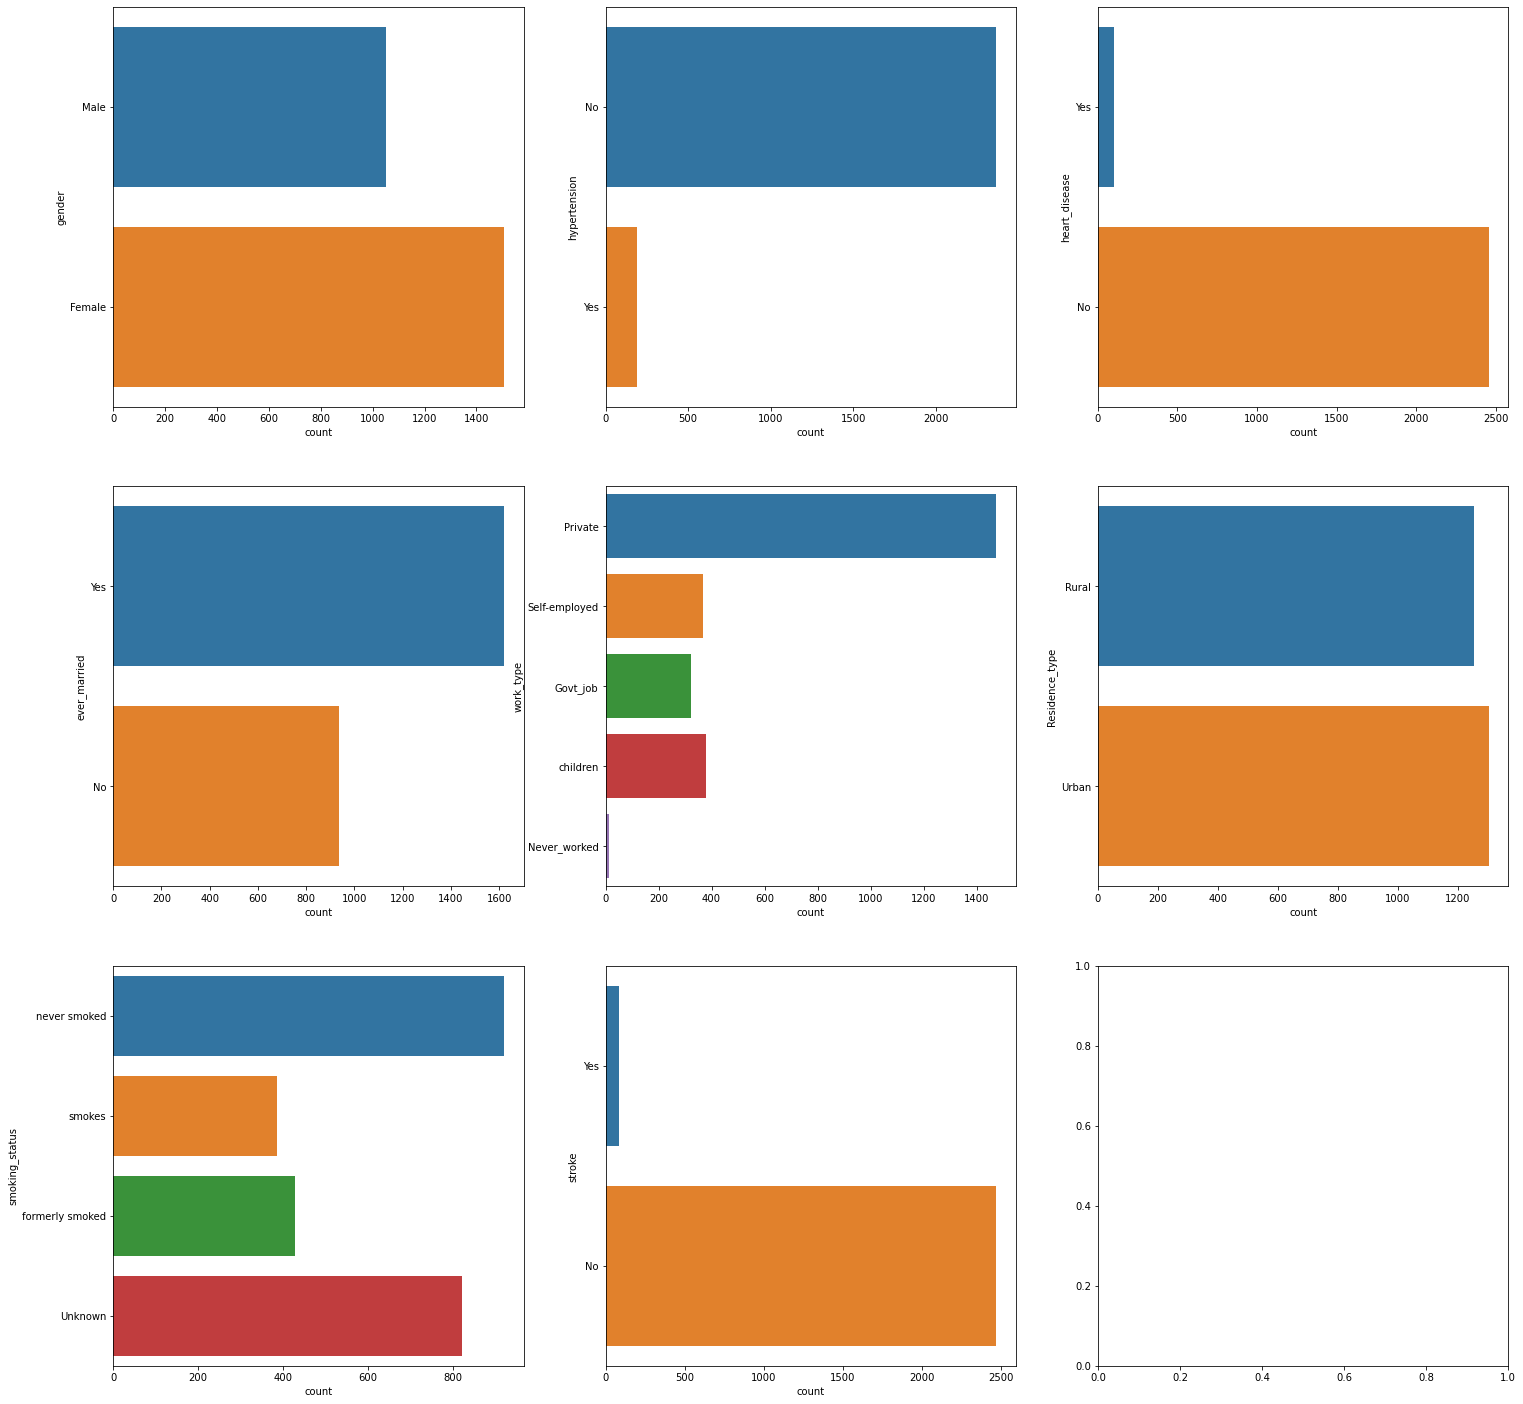






 the graphs of the numerical columns


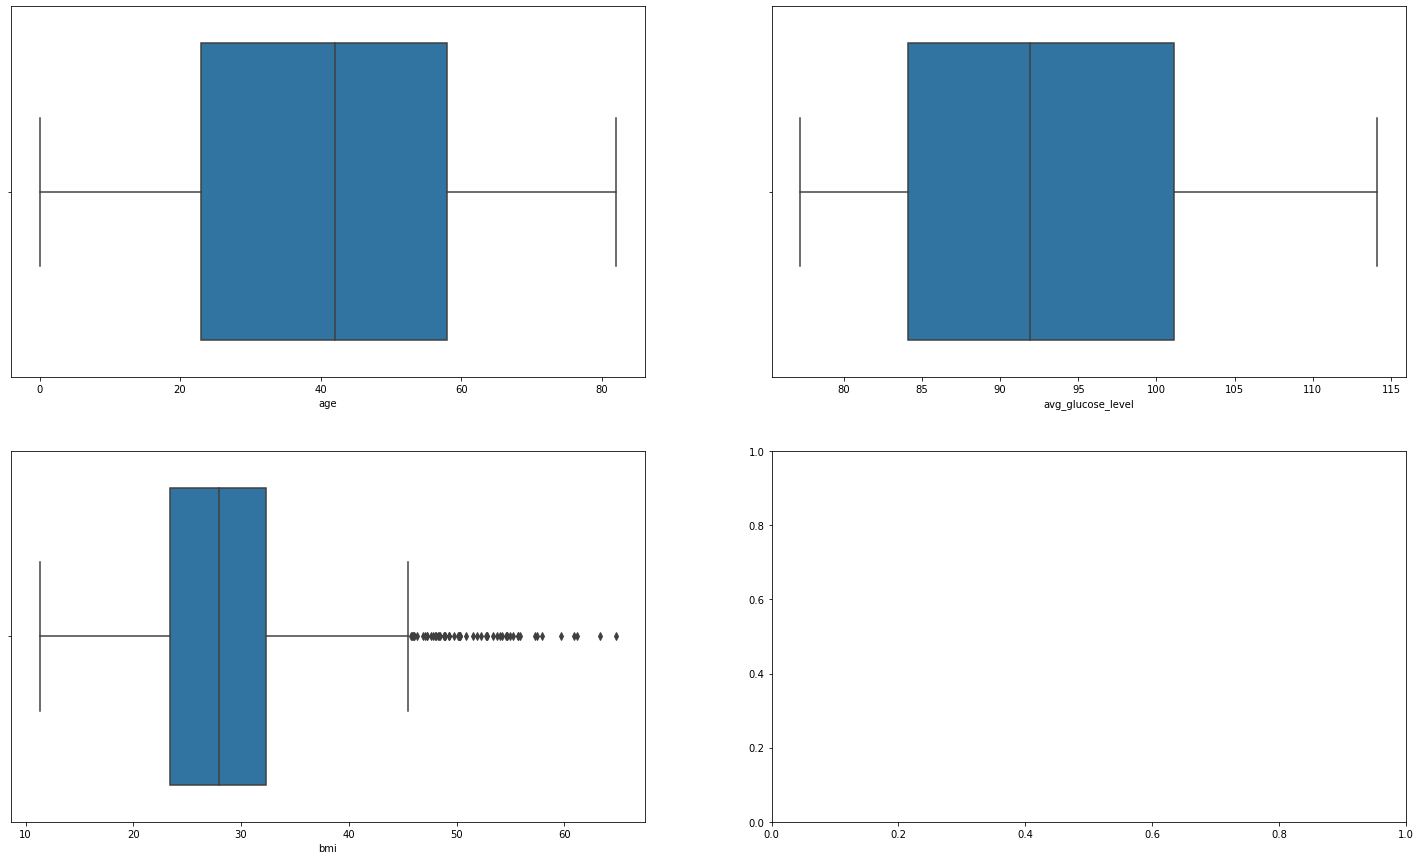

In [553]:
from matplotlib import pyplot as plt
import seaborn as sns

nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

print("the graphs of the categorical columns")
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()

print(5*"\n","the graphs of the numerical columns")
# for col in num_columns:
#     plt.figure(figsize=(5,5))
#     sns.histplot(x=col,bins=10,data=df)
#     plt.xticks(rotation=45)
#     plt.show()

# fig,axes = plt.subplots(2, 2, figsize=(25,25))
# for c,nCol in enumerate(num_columns):
#     sns.histplot(x=nCol,bins=10,data=df)
#     plt.xticks(rotation=45)
# plt.show()


fig,axes = plt.subplots(2, 2, figsize=(25,15))
for c,nCol in enumerate(num_columns):
    sns.boxplot(x=nCol,data=df,ax=axes.flatten()[c])
plt.show()


## iii. bivariate plots

the graphs of the categorical columns differentiated by the dependent variable


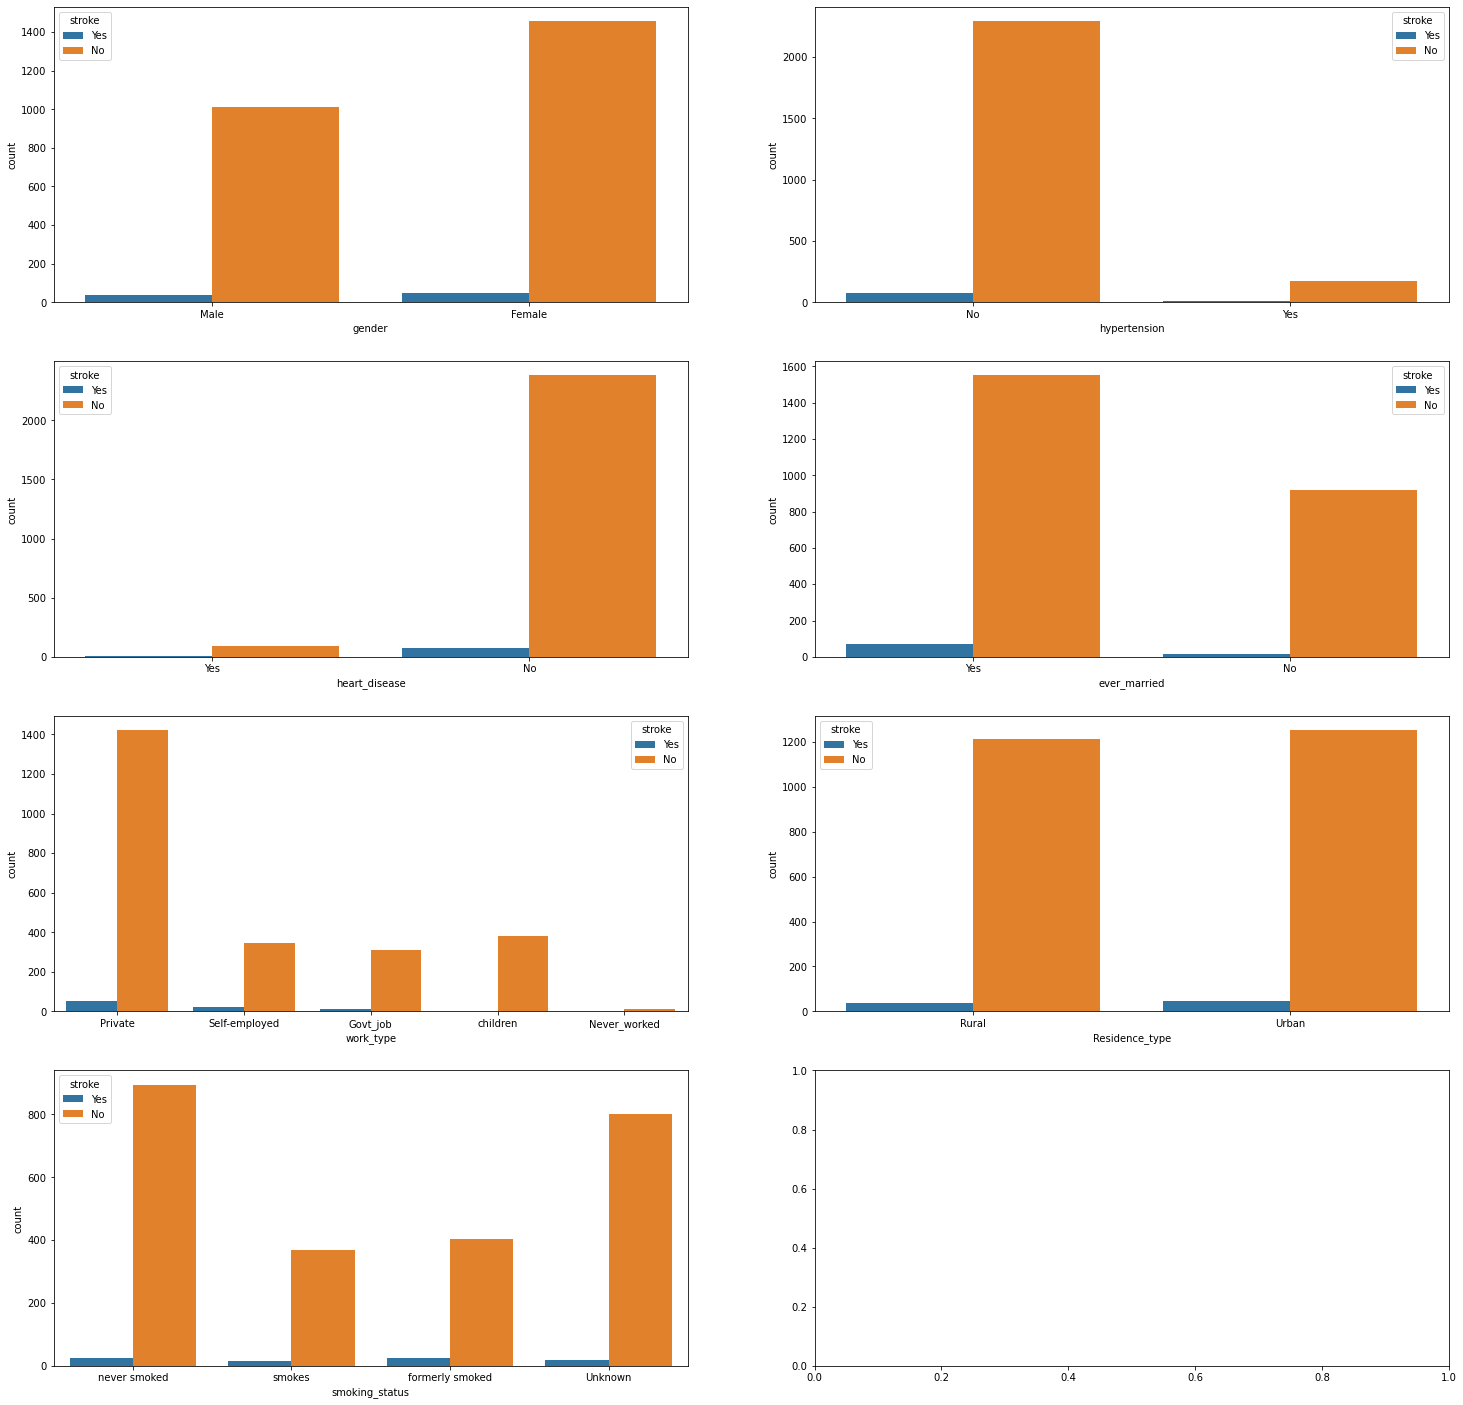






 the graphs of the numerical columns differentiated by the dependent variable


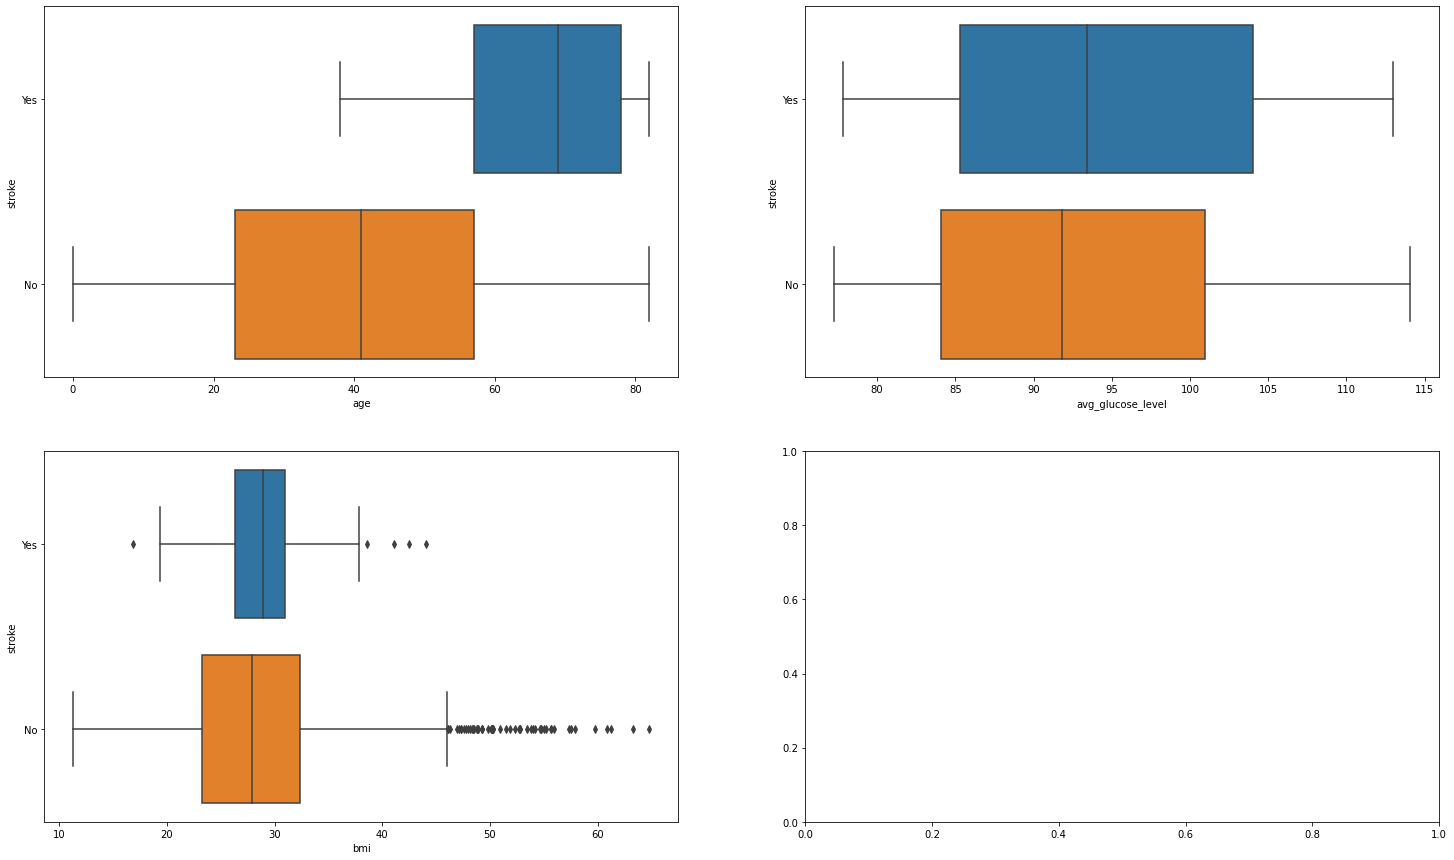

In [554]:
ndf = df.drop(["stroke"],axis=1)

num_columns = ndf.select_dtypes(exclude='object').columns
cat_columns = ndf.select_dtypes(include='object').columns

nCols=2   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 


print("the graphs of the categorical columns differentiated by the dependent variable")
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(x=col,hue="stroke",data=df,ax=axes.flatten()[ind])
plt.show()

print(5*"\n","the graphs of the numerical columns differentiated by the dependent variable")
# for col in num_columns:
#     plt.figure(figsize=(5,5))
#     sns.boxplot(y=col,x="stroke",data=df)
#     plt.xticks(rotation=45)
#     plt.show()
fig,axes = plt.subplots(2, 2, figsize=(25,15))
for c,nCol in enumerate(num_columns):
    sns.boxplot(x=nCol,y="stroke",data=df, ax=axes.flatten()[c])
plt.show()


## iv. advanced graphs

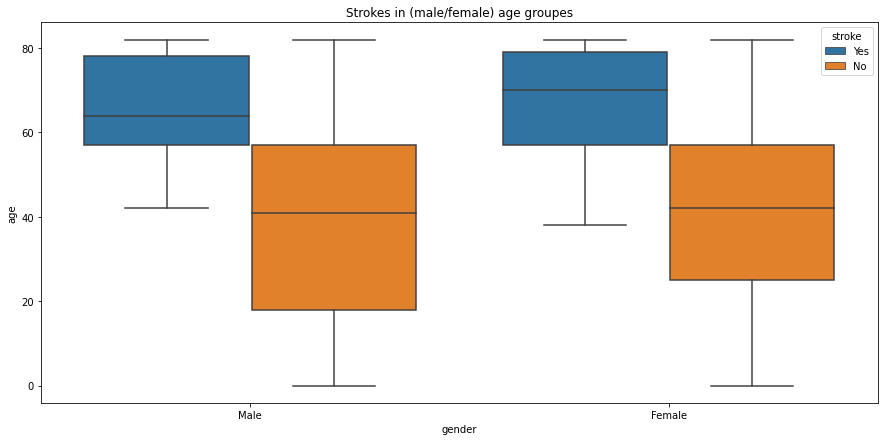

In [555]:
plt.figure(figsize=(15, 7))
sns.boxplot(x ='gender', y ='age', hue='stroke', data = df)
plt.title('Strokes in (male/female) age groupes')
plt.show()


##### Males apper to have strokes at younger age than females

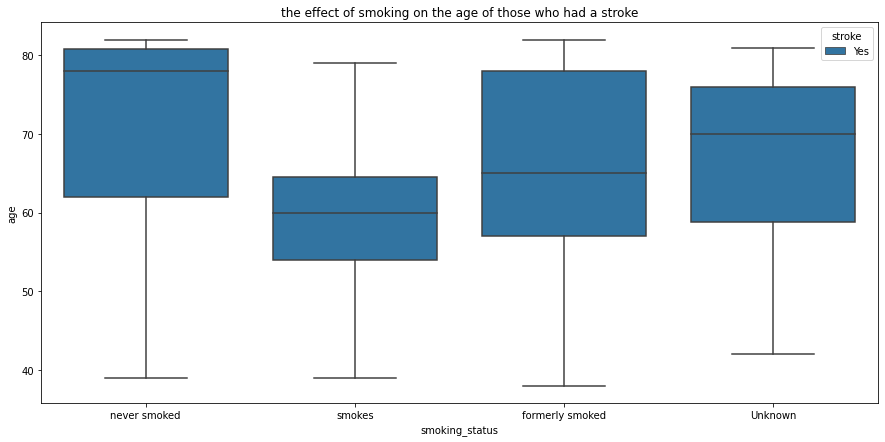

In [556]:
plt.figure(figsize=(15, 7))
selected_rows = df['stroke']=='Yes'
sns.boxplot(x ='smoking_status', y ='age', hue='stroke', data=df.loc[selected_rows,:])
plt.title('the effect of smoking on the age of those who had a stroke')
plt.show()

##### those who smoke or used to smoke tend to have a stroke a younger age than those who do not

the work type and marital status of those who had strokes only


<Figure size 432x288 with 0 Axes>

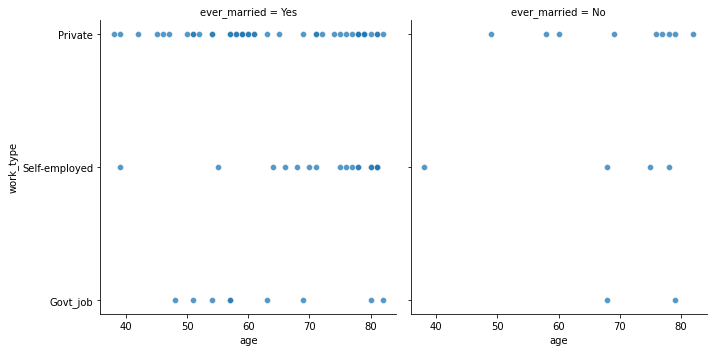

In [494]:
plt.figure()
selected_rows = df['stroke']=='Yes'
h=sns.relplot(y='work_type',x='age',
            col='ever_married',
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=df.loc[selected_rows,:])
print("the work type and marital status of those who had strokes only")

plt.show()

##### those who have been married berfore are more likely to have a stroke
##### the chance of having a stroke is much higher for private work_type

<Figure size 432x288 with 0 Axes>

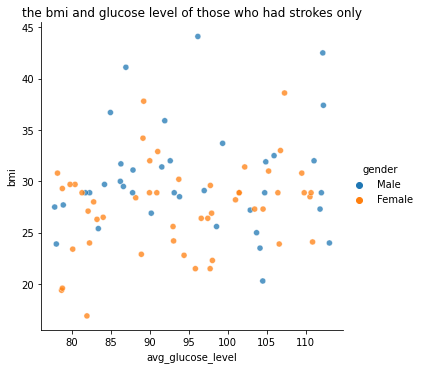

In [557]:

plt.figure()
h=sns.relplot(y='bmi',x='avg_glucose_level',
            hue='gender',
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=df.loc[selected_rows,:])
plt.title("the bmi and glucose level of those who had strokes only")
plt.show()

##### the average bmi for those who had strokes is in the range[29,31] 


## v. Relationships between variables

### a. Correlation

Text(0.5, 1.0, 'Correlation of features')

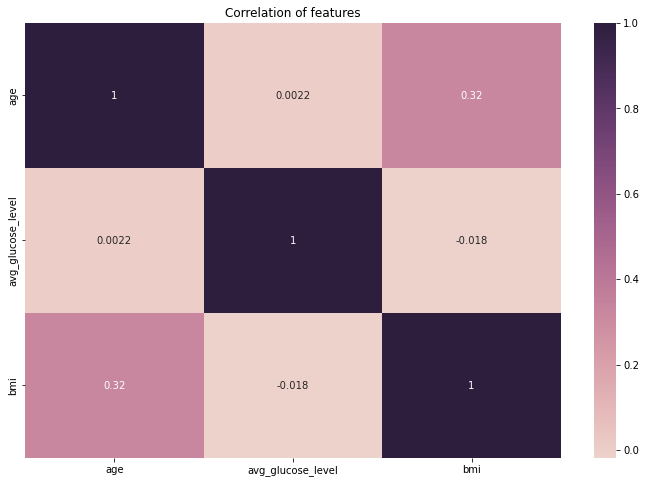

In [558]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation of features")

### b. Principal Component Analysis (PCA)

In [531]:
ndf=df.copy()

from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder1.fit(ndf['stroke'])
ndf['stroke']=encoder1.transform(ndf['stroke'])

encoder1.fit(ndf['smoking_status'])
ndf['smoking_status']=encoder1.transform(ndf['smoking_status'])

encoder1.fit(ndf['gender'])
ndf['gender']=encoder1.transform(ndf['gender'])

encoder1.fit(ndf['Residence_type'])
ndf['Residence_type']=encoder1.transform(ndf['Residence_type'])

encoder1.fit(ndf['work_type'])
ndf['work_type']=encoder1.transform(ndf['work_type'])

encoder1.fit(ndf['ever_married'])
ndf['ever_married']=encoder1.transform(ndf['ever_married'])

encoder1.fit(ndf['heart_disease'])
ndf['heart_disease']=encoder1.transform(ndf['heart_disease'])

encoder1.fit(ndf['hypertension'])
ndf['hypertension']=encoder1.transform(ndf['hypertension'])

from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(ndf[['avg_glucose_level']])
ndf['avg_glucose_level']=scaler2.transform(ndf[['avg_glucose_level']])
scaler2.fit(ndf[['bmi']])
ndf['bmi']=scaler2.transform(ndf[['bmi']])


# scaler2.fit(ndf[['bmi']])
# ndf['bmi']=scaler2.transform(ndf[['bmi']])

scaler2.fit(ndf[['age']])
ndf['age']=scaler2.transform(ndf[['age']])


num_columns = ndf.select_dtypes(exclude='object').columns
pca_input_columns=num_columns.drop(['stroke'])

from sklearn.decomposition import PCA
pca = PCA(n_components=6) # get pca model

principalComponents = pca.fit_transform(ndf[pca_input_columns]) # get two components


## # Same as above in two steps
# pca.fit(df[pca_input_columns])
# principalComponents = pca.transform(df[pca_input_columns])

ndf['pca1'] = principalComponents[:,0]
ndf['pca2'] = principalComponents[:,1]
ndf['pca3'] = principalComponents[:,2]
ndf['pca4'] = principalComponents[:,3]
ndf['pca5'] = principalComponents[:,4]
ndf['pca6'] = principalComponents[:,5]
display(ndf)

gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  1.739556             0              1             1          2   
1          0  1.246692             0              0             0          2   
2          0  1.784362             1              0             1          2   
3          0  0.574605             0              0             1          2   
4          0  0.843440             0              0             0          2   
...      ...       ...           ...            ...           ...        ...   
2551       0 -1.038405             0              0             0          2   
2552       0 -1.262434             0              0             0          4   
2553       0  1.739556             1              0             1          2   
2554       0 -0.276706             0              0             1          3   
2555       0  0.126547             0              0             1          0   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  \
0                  0           1.258839  0.551229               2       1   
1                  1           0.133692 -0.758430               2       1   
2                  0          -1.228584  0.173183               2       1   
3                  1           1.121245 -0.150856               3       1   
4                  1          -0.370818  1.266816               2       1   
...              ...                ...       ...             ...     ...   
2551               1          -0.992430  2.495465               0       0   
2552               0           0.981700 -1.325498               0       0   
2553               1          -0.904604  0.063820               2       0   
2554               0          -0.978768  0.294698               2       0   
2555               1          -0.755300 -0.299374               0       0   

          pca1      pca2      pca3      pca4      pca5      pca6  
0     1.544213  1.246559  0.646851  0.259319 -1.070533  0.690552  
1     0.581233  0.260965 -0.424558 -0.625828 -1.054103 -0.565587  
2     1.452078 -1.158683  0.024715 -0.009629 -1.407004  0.428119  
3     1.200912  1.349488 -0.923168  0.115007 -0.611967 -0.602314  
4     1.233294 -0.419496  0.124299  0.863429 -0.002078 -0.560407  
...        ...       ...       ...       ...       ...       ...  
2551 -0.110332 -1.431061  1.406121  1.427125  2.069732 -0.592700  
2552 -2.954503  0.996621  0.118417 -0.012184 -0.130850  0.297066  
2553  1.390410 -0.851091  0.027611 -0.074282 -1.411927 -0.530928  
2554 -0.078324 -0.825846 -0.702256  0.911128 -0.308644  0.373563  
2555  0.622862 -1.059366  0.999183 -1.989456  0.947550 -0.576893  

[2556 rows x 17 columns]

The variance captured by pca 1 is:  36.41%
The variance captured by pca 2 is:  16.22%
The variance captured by pca 3 is:  13.64%
The variance captured by pca 4 is:  11.50%
The variance captured by pca 5 is:  11.03%
The variance captured by pca 6 is:  4.03%


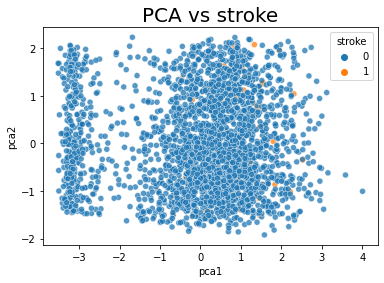

<Figure size 432x288 with 0 Axes>

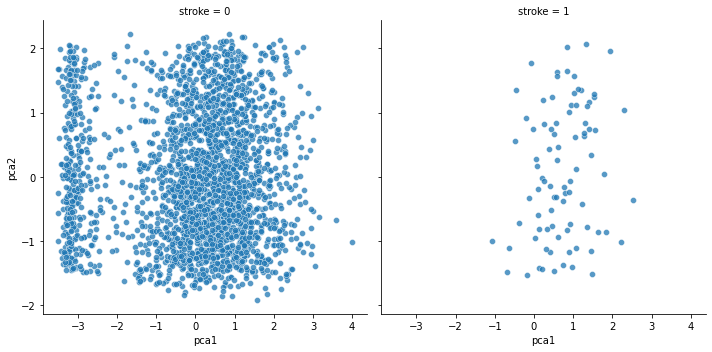

In [533]:
for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')
    
plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='stroke', 
            alpha=0.75,data=ndf)
plt.title('PCA vs stroke', fontsize = 20)
plt.show()

plt.figure()
h=sns.relplot(y='pca2',x='pca1',
            col='stroke',
            kind='scatter',alpha=0.75,
            height=5, aspect=1,
            data=ndf)

plt.show()

In [559]:
pca_1_coefficients=np.round(pca.components_[0],4)

zipList=list(zip(pca_input_columns,pca_1_coefficients))
ndf=pd.DataFrame.from_records(zipList,columns=['field','coeff'])

display(ndf.sort_values(by=['coeff'], ascending=False))

pca_2_coefficients=np.round(pca.components_[1],4)

zipList=list(zip(pca_input_columns,pca_2_coefficients))
ndf=pd.DataFrame.from_records(zipList,columns=['field','coeff'])

display(ndf.sort_values(by=['coeff'], ascending=False))

field   coeff
9     smoking_status  0.4822
1                age  0.4730
8                bmi  0.4165
4       ever_married  0.2010
2       hypertension  0.0341
3      heart_disease  0.0150
6     Residence_type  0.0046
7  avg_glucose_level  0.0014
0             gender -0.0285
5          work_type -0.5725

field   coeff
7  avg_glucose_level  0.9789
9     smoking_status  0.1690
5          work_type  0.0463
0             gender  0.0096
2       hypertension  0.0067
3      heart_disease  0.0033
4       ever_married -0.0074
6     Residence_type -0.0216
1                age -0.0294
8                bmi -0.0980

## Summarise of findings:

- strokes are more common in females
- strokes are more common in those who got married
- smokers and formerly smokers had strokes at a younger age than others
- strokes are more common at the age range [68,73] years old 
- strokes are more common in people with work types (private, self-employed)
- the area of residence does not have a major affect on the chance of having a stroke
- the average bmi and glucose level are between [29,31] and [100,105] respectively in those who had strokes 
- hypertension and heart_disease do not seem to have a major affect on the chance of having a stroke
- the correlation between the numerical variables is very small
- the variance valuse captuered by the PCA shows that no linear combination of variables can explain much variability

## The ideal modele:
Classification models.

Reason: as our objective is to forcast whether a person will have a stroke or not, it is the ideal job for the calssification models to draw this conclusion from the analyzed data after the training and the testing

# Module Building

## a. Estimate

In [560]:
import numpy as np
from sklearn.model_selection import train_test_split
# X = df.iloc[:,:-1].values
# y = df.iloc[:, -1].values

X=df.copy()
display(X)
y=X["stroke"]

X=X.drop(["stroke"],axis=1)
X=pd.get_dummies(X,columns=["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"],drop_first=True)
# X=X.drop(columns=["gender_Male","hypertension_Yes","heart_disease_Yes","ever_married_Yes","work_type_children","Residence_type_Urban","smoking_status_smokes"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




import matplotlib.pyplot as plt
plt.figure(figsize =(12,8),dpi=1000)
tree.plot_tree(dtClf,feature_names=X.columns[:].tolist(),class_names=['0','1'],
               filled=True,rounded=True,max_depth=4); #
plt.show()



gender  age hypertension heart_disease ever_married      work_type  \
0       Male   80           No           Yes          Yes        Private   
1     Female   69           No            No           No        Private   
2     Female   81          Yes            No          Yes        Private   
3     Female   54           No            No          Yes        Private   
4     Female   60           No            No           No        Private   
...      ...  ...          ...           ...          ...            ...   
2551  Female   18           No            No           No        Private   
2552  Female   13           No            No           No       children   
2553  Female   80          Yes            No          Yes        Private   
2554  Female   35           No            No          Yes  Self-employed   
2555  Female   44           No            No          Yes       Govt_job   

     Residence_type  avg_glucose_level    bmi smoking_status stroke  
0             Rural             105.92  32.50   never smoked    Yes  
1             Urban              94.39  22.80   never smoked    Yes  
2             Rural              80.43  29.70   never smoked    Yes  
3             Urban             104.51  27.30         smokes    Yes  
4             Urban              89.22  37.80   never smoked    Yes  
...             ...                ...    ...            ...    ...  
2551          Urban              82.85  46.90        Unknown     No  
2552          Rural             103.08  18.60        Unknown     No  
2553          Urban              83.75  28.89   never smoked     No  
2554          Rural              82.99  30.60   never smoked     No  
2555          Urban              85.28  26.20        Unknown     No  

[2556 rows x 11 columns]

## b. Compare

### random forest classifier

In [561]:
from sklearn.ensemble import RandomForestClassifier

df2 = pd.get_dummies(df,drop_first=True)
rf = RandomForestClassifier(n_estimators=6,criterion='entropy', random_state=0)#max_features=auto default,
rf = rf.fit(df2.drop('stroke_Yes', axis=1), df2['stroke_Yes'])


rf = RandomForestClassifier(random_state=0,criterion='entropy')
rf = rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)
rand_result= accuracy_score(y_test, rf_y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Random Forest: \n")
print("Accuracy:=",  rand_result)
print("Confusion Matrix:= \n", confusion_matrix(y_test, rf_y_pred) )

rf.estimators_[0].classes_   #to know the classes


fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=1000)
for index,axis in enumerate(axes.flatten()):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = df2.columns[0:-1], 
                   class_names=['no','yes'],
                   filled = True,
                   max_depth=2,
                   ax = axis);

    axis.set_title('Estimator: ' + str(index+1), fontsize = 11)


Random Forest: 

Accuracy:= 0.9765319426336375
Confusion Matrix:= 
 [[749   0]
 [ 18   0]]


### decision tree classifier

In [563]:
from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)
 
tree_result=accuracy_score(y_test, dt_y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print("Accuracy:=", tree_result )
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

Decision Tree: 

Accuracy:= 0.9478487614080835
Confusion Matrix:= 
 [[723  26]
 [ 14   4]]


### naive_bayes - categorical data

In [564]:
from sklearn.naive_bayes import CategoricalNB 
NBClf = CategoricalNB(alpha=1.0e-10, class_prior=None, fit_prior=True)  
NBClf.fit(X_train,y_train)
NB_y_pred = NBClf.predict(X_test)
naiveC_result=accuracy_score(y_test, NB_y_pred)
print("NB for Categorical Data: \n")
print("Accuracy:=", naiveC_result )
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )


NB for Categorical Data: 

Accuracy:= 0.9556714471968709
Confusion Matrix:= 
 [[732  17]
 [ 17   1]]


### naive_bayes - numerical data

In [565]:
from sklearn.naive_bayes import GaussianNB
NBClf2 = GaussianNB()   
NBClf2.fit(X_train,y_train)
NB_y_pred = NBClf2.predict(X_test)
naiveN_result=accuracy_score(y_test, NB_y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical  Data: \n")
print("Accuracy:=",  naiveN_result)
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

NB for Numerical  Data: 

Accuracy:= 0.2907431551499348
Confusion Matrix:= 
 [[205 544]
 [  0  18]]


## Reults of the classifiers

In [566]:
results= pd.DataFrame( [[round(rand_result*100,3)],[round(tree_result*100,3)],[round(naiveC_result*100,3)],[round(naiveN_result*100,3)]],
                 index=['Random Forest','Decision Tree','naive_bayes - categorical','naive_bayes - numerical'],
                     columns=["Accuracy"])

display(results)

Accuracy
Random Forest                97.653
Decision Tree                94.785
naive_bayes - categorical    95.567
naive_bayes - numerical      29.074

## c. Interpret

From the results, it can be seen that the Random Forest classifier performs better on the given data. There is some overlap between the two classes.

# Operationalize:

### a: Methodology
Data Analysis algorithms are sensitive to the type of input data. Therfore, the dataset must be cleaned and prepared before advancing further. Regarding numerical data, any unwanted symbols or characters such as negative sign or dollar sign should be removed. Moreover, missing value were treated by imputing the mean value of the respective column and then scaled to be used later in the analysis. In regard to the categorical data, the missing values were subtituted by the mode of their respective columns, and any columns that holds records of data that will not affect the analysis in any way were dropped such as (id, name, ... etc). Lastly, to be able to extract meaningful data to be visualized later in the analysis, encoding techneques like one-hot encoding and label encoding were implemented. Countplots, boxplots and relplots were created after that for getting insights to the differnet variables in our data. Following the studying of the relationships between the variables and taking into consideration the fact that the dependent variable depicts binary resluts in the form of (yes/no), the conclusion drawn from that was that the classification model would be ideal to be used for further analysis. The decision tree classifier, naive_bayes classifiers were implemented to develop the classification models. The train test split is used with 70% of data for training and 30% of data for testing the developed model.

### b: Problems
1. Incomplete or inaccurate data: If the data used for categorization is incomplete or inaccurate, it can lead to incorrect predictions. For example, some data were dropped in the Data Preparation phase like the rows that contained the value “other” in “gender”.

2. Difficulty in identifying relevant features: Identifying the most important features in the data can be challenging and can impact the accuracy of the predictions.

3. The complexity of the data since the predicted outcome depends on some complex relationships between the data.

# Communicate results:

### a: Conclusion
a- We found through analyzing the data some predictions about who is at risk of getting a stroke by analyzing some health and societal aspects. The data was prepared by removing and resolving unwanted attributes like resolving the age attribute into integer instead of float, deleting the rows that have the value “other” …etc. through the model planning phase, the statistical summaries show some pivot tables that are based on the individual’s social life, also various graphical information that includes numerical and categorical information, strokes in age groups, the effect of smoking on the age of those who had a stroke, work type, and marital status of those who had strokes and the BMI and glucose level of those who had strokes. Correlation and Principal Component Analysis (PCA) found the relationship between variables. In the model-building phase, we estimated the values by using a tree plot. We compared between decision tree classifier, Random Forest classifier, and naïve Bayes and we found that the Random Forest classifier performs better on the given data. In the Operationalize phase, the framework for approaching and solving the problems was discussed, and some problems and obstacles were listed like “Incomplete or inaccurate data”. In conclusion, we found through this analysis that Strokes are more common in females, smokers had strokes at a younger age than others, Strokes are more common at the age range [68,73] years old, and Certain factors such as occupation, area of residence, BMI, and glucose levels may be associated with an increased risk of stroke.



### b: Recommendations

1. Collect more diverse data, to reduce bias in categorization, it is important to collect data from diverse sources and populations.
2. Ensure data quality, especially when the analysis is trying to predict something vital like strokes in this project.
3. enforcing data analysts (students in this case) on building a transparent module which means it should be understood by the regular human being. 
